In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
df = pd.read_csv ('/content/PRAS_limpo_analise_v1.csv', sep=';', encoding='iso8859', decimal=',')
df.head()

,ENT_NOM,ENT_DES_TIP_EST,ENT_DES_CANT,ENT_DES_PARR,ENT_DES_TIP_PARR,ENT_NIV,PROF_NOMBRES,PROF_FEC_NAC,PROF_SEXO,PROF_ESP_ATE,PCTE_NOMBRES,PCTE_SEXO,PCTE_ORI_SEX,PCTE_IDE_GEN,PCTE_FEC_NAC,PCTE_NACIONALIDAD,PCTE_AUTID_ETN,PCTE_NAC_ETN,PCTE_PUEBLO,PCTE_SEG,PCTE_DES_CANT,PCTE_DES_PARR,PCTE_PESO,PCTE_TALLA,ajuste_ALTURA,IMC,IMC_Base,PCTE_ULT_PESO,PCTE_ULT_TALLA,PCTE_ULT_IMC,PCTE_ULT_PERIM_CEFALICO,PCTE_ULT_VAL_HEMOGLOBINA,PCTE_ULT_VAL_HEMO_CORREGIDO,PCTE_IND_ANEMIA_HEMOGLOBINA,PCTE_ULT_TALLA_EDAD_Z,PCTE_CAT_TALLA_EDAD_Z,PCTE_ULT_PESO_EDAD_Z,PCTE_CAT_PESO_EDAD_Z,PCTE_ULT_IMC_EDAD_Z,PCTE_CAT_IMC_EDAD_Z,PCTE_ULT_PESO_LONGTALLA_Z,PCTE_CAT_PESO_LONGTALLA_Z,DOEL_NUM_ATEN_CONTR_PRENATAL,DOEL_PRES_HIE_ACIDFOLIC_MUJER,DOEL_VIH,SIVANVAC_DLU24H_RLM_0A5,SIVANVAC_DLU24H_CON_ASSS_6A8,SIVAN_HRHIERRO_MULVIT_MINPOLVO,SIVAN_HR_VITAMINA_A,SIVAN_HR_EXCLUS_LMAT_DESDENAC,SIVANVAC_ROT_1RA_DOS,SIVANVAC_ROT_2DA_DOS,SIVANVAC_NEU_1RA_DOS,SIVANVAC_NEU_2DA_DOS,SIVANVAC_NEU_3RA_DOS,ATEMED_FEC_INI,ATEMED_CIE10,ATEMED_DES_CIE10,ATEMED_NOT_OBL_DIAG,ATEMED_TIP_DIAG,ATEMED_CRON_DIAG,ATEMED_CON_DIAG,ATEMED_TIP_ATE,ATEMED_ID_LUG_ATE,ATEMED_LUG_ATE,PCTE_ULT_IMC_CATEGORIA,PCTE_GRP_PRI_Embarazadas,PCTE_GRP_PRI_Discapacidad,PCTE_GRP_PRI_Assedio_Sexual_Trabajo,PCTE_GRP_PRI_Violencia_Psicologica,PCTE_GRP_PRI_Violencia_Sexual,PCTE_GRP_PRI_Violencia_Fisica,PCTE_GRP_PRI_Maltrato_Infantil,PCTE_GRP_PRI_Enfermidades_Catastroficas,PCTE_GRP_PRI_Desastres_Naturales,PCTE_GRP_PRI_Desastres_Antropogenicos,PCTE_GRP_PRI_Penitenciarios,PCTE_GRP_PRI_QTD
0,SAN CARLOS DE LAS MINAS,CENTRO DE SALUD TIPO A,ZAMORA,SAN CARLOS DE LAS MINAS,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,LUZ MARIA,Mujer,Heterosexual,Femenino,01/08/1939,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0.0,147.0,1.47,0.0,Abaixo do Peso,0.0,147.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,NO,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,21/11/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,715,Domicilio,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0
1,SAN CARLOS DE LAS MINAS,CENTRO DE SALUD TIPO A,ZAMORA,SAN CARLOS DE LAS MINAS,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,VICENTE DEMECIO,Hombre,Heterosexual,Masculino,06/05/1962,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0.0,165.0,1.65,0.0,Abaixo do Peso,0.0,165.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,21/11/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,715,Domicilio,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0
2,28 DE MAYO (YACUAMBI),CENTRO DE SALUD TIPO A,YACUAMBI,28 DE MAYO (SAN JOSE DE YACUAMBI),Urbano,NIVEL 1,JUAN CARLOS,01/08/1962,Hombre,Medicina General,MANUEL ANTONIO,Hombre,Heterosexual,No info,09/12/1963,ECUATORIANO,Indígena,Kichwa,Saraguro,"IESS, Afiliado seguro Campesino",YACUAMBI,28 DE MAYO (SAN JOSE DE YACUAMBI),0.0,160.0,1.60,0.0,Abaixo do Peso,0.0,160.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,18/09/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,712,Establecimiento de Salud,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0
3,CUMBARATZA,CENTRO DE SALUD TIPO A,ZAMORA,CUMBARATZA,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,ANGEL POLIVIO,Hombre,Heterosexual,No info,27/12/1966,ECUATORIANO,Mestizo,No info,No info,"IESS, Afiliado seguro Campesino",ZAMORA,CUMBARATZA,0.0,160.0,1.60,0.0,Abaixo do Peso,0.0,160.0,No info,No info,No info,N



```
# Isto está formatado como código
```

# Informações dos dados



In [ ]:
print('{} dimensões da base'.format(df.shape))
print('{} total de colunas'.format(len(df.columns)))
print('{} total de colunas categoricas'.format(len(df.select_dtypes('object').columns)))

(20930, 78) dimensões da base
78 total de colunas
63 total de colunas categoricas


 ##***Conversão***


1.   Item da lista
2.   Item da lista


* Converter coluna IMC para target (>= 30 'obeso')
* Descartar 'IMC_Base' e as medidas de altura e peso, pois, tratam-se de variáveis viciadas (IMC é calculado a partir de peso e altura, portanto, o modelo tende a apenas usar as 2 para gerar o target)
* Descartar dados sem relevância de modelo

In [ ]:
df['target'] = df.IMC >= 30
df['target'] = df.target.astype('int')

In [ ]:
df.head()

,ENT_NOM,ENT_DES_TIP_EST,ENT_DES_CANT,ENT_DES_PARR,ENT_DES_TIP_PARR,ENT_NIV,PROF_NOMBRES,PROF_FEC_NAC,PROF_SEXO,PROF_ESP_ATE,PCTE_NOMBRES,PCTE_SEXO,PCTE_ORI_SEX,PCTE_IDE_GEN,PCTE_FEC_NAC,PCTE_NACIONALIDAD,PCTE_AUTID_ETN,PCTE_NAC_ETN,PCTE_PUEBLO,PCTE_SEG,PCTE_DES_CANT,PCTE_DES_PARR,PCTE_PESO,PCTE_TALLA,ajuste_ALTURA,IMC,IMC_Base,PCTE_ULT_PESO,PCTE_ULT_TALLA,PCTE_ULT_IMC,PCTE_ULT_PERIM_CEFALICO,PCTE_ULT_VAL_HEMOGLOBINA,PCTE_ULT_VAL_HEMO_CORREGIDO,PCTE_IND_ANEMIA_HEMOGLOBINA,PCTE_ULT_TALLA_EDAD_Z,PCTE_CAT_TALLA_EDAD_Z,PCTE_ULT_PESO_EDAD_Z,PCTE_CAT_PESO_EDAD_Z,PCTE_ULT_IMC_EDAD_Z,PCTE_CAT_IMC_EDAD_Z,PCTE_ULT_PESO_LONGTALLA_Z,PCTE_CAT_PESO_LONGTALLA_Z,DOEL_NUM_ATEN_CONTR_PRENATAL,DOEL_PRES_HIE_ACIDFOLIC_MUJER,DOEL_VIH,SIVANVAC_DLU24H_RLM_0A5,SIVANVAC_DLU24H_CON_ASSS_6A8,SIVAN_HRHIERRO_MULVIT_MINPOLVO,SIVAN_HR_VITAMINA_A,SIVAN_HR_EXCLUS_LMAT_DESDENAC,SIVANVAC_ROT_1RA_DOS,SIVANVAC_ROT_2DA_DOS,SIVANVAC_NEU_1RA_DOS,SIVANVAC_NEU_2DA_DOS,SIVANVAC_NEU_3RA_DOS,ATEMED_FEC_INI,ATEMED_CIE10,ATEMED_DES_CIE10,ATEMED_NOT_OBL_DIAG,ATEMED_TIP_DIAG,ATEMED_CRON_DIAG,ATEMED_CON_DIAG,ATEMED_TIP_ATE,ATEMED_ID_LUG_ATE,ATEMED_LUG_ATE,PCTE_ULT_IMC_CATEGORIA,PCTE_GRP_PRI_Embarazadas,PCTE_GRP_PRI_Discapacidad,PCTE_GRP_PRI_Assedio_Sexual_Trabajo,PCTE_GRP_PRI_Violencia_Psicologica,PCTE_GRP_PRI_Violencia_Sexual,PCTE_GRP_PRI_Violencia_Fisica,PCTE_GRP_PRI_Maltrato_Infantil,PCTE_GRP_PRI_Enfermidades_Catastroficas,PCTE_GRP_PRI_Desastres_Naturales,PCTE_GRP_PRI_Desastres_Antropogenicos,PCTE_GRP_PRI_Penitenciarios,PCTE_GRP_PRI_QTD,target
0,SAN CARLOS DE LAS MINAS,CENTRO DE SALUD TIPO A,ZAMORA,SAN CARLOS DE LAS MINAS,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,LUZ MARIA,Mujer,Heterosexual,Femenino,01/08/1939,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0.0,147.0,1.47,0.0,Abaixo do Peso,0.0,147.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,NO,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,21/11/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,715,Domicilio,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0,0
1,SAN CARLOS DE LAS MINAS,CENTRO DE SALUD TIPO A,ZAMORA,SAN CARLOS DE LAS MINAS,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,VICENTE DEMECIO,Hombre,Heterosexual,Masculino,06/05/1962,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0.0,165.0,1.65,0.0,Abaixo do Peso,0.0,165.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,21/11/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,715,Domicilio,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0,0
2,28 DE MAYO (YACUAMBI),CENTRO DE SALUD TIPO A,YACUAMBI,28 DE MAYO (SAN JOSE DE YACUAMBI),Urbano,NIVEL 1,JUAN CARLOS,01/08/1962,Hombre,Medicina General,MANUEL ANTONIO,Hombre,Heterosexual,No info,09/12/1963,ECUATORIANO,Indígena,Kichwa,Saraguro,"IESS, Afiliado seguro Campesino",YACUAMBI,28 DE MAYO (SAN JOSE DE YACUAMBI),0.0,160.0,1.60,0.0,Abaixo do Peso,0.0,160.0,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,18/09/2019,Z736,PROBLEMAS RELACIONADOS CON LA LIMITACION DE LA...,No info,Prevención,Subsecuente,No info,712,Establecimiento de Salud,No info,No info,0,1,0,0,0,0,0,0,0,0,0,1.0,0
3,CUMBARATZA,CENTRO DE SALUD TIPO A,ZAMORA,CUMBARATZA,Rural,NIVEL 1,ELISA MARIBEL,02/11/1978,Mujer,Medicina Familiar Y Comunitaria,ANGEL POLIVIO,Hombre,Heterosexual,No info,27/12/1966,ECUATORIANO,Mestizo,No info,No info,"IESS, Afiliado seguro Campesino",ZAMORA,CUMBARATZA,0.0,160.0,1.60,0.0,Abaixo do Peso,0.0,160.0,No info,No i

In [ ]:
df.columns

Index(['ENT_NOM', 'ENT_DES_TIP_EST', 'ENT_DES_CANT', 'ENT_DES_PARR',
       'ENT_DES_TIP_PARR', 'ENT_NIV', 'PROF_NOMBRES', 'PROF_FEC_NAC',
       'PROF_SEXO', 'PROF_ESP_ATE', 'PCTE_NOMBRES', 'PCTE_SEXO',
       'PCTE_ORI_SEX', 'PCTE_IDE_GEN', 'PCTE_FEC_NAC', 'PCTE_NACIONALIDAD',
       'PCTE_AUTID_ETN', 'PCTE_NAC_ETN', 'PCTE_PUEBLO', 'PCTE_SEG',
       'PCTE_DES_CANT', 'PCTE_DES_PARR', 'PCTE_PESO', 'PCTE_TALLA',
       'ajuste_ALTURA', 'IMC', 'IMC_Base', 'PCTE_ULT_PESO', 'PCTE_ULT_TALLA',
       'PCTE_ULT_IMC', 'PCTE_ULT_PERIM_CEFALICO', 'PCTE_ULT_VAL_HEMOGLOBINA',
       'PCTE_ULT_VAL_HEMO_CORREGIDO', 'PCTE_IND_ANEMIA_HEMOGLOBINA',
       'PCTE_ULT_TALLA_EDAD_Z', 'PCTE_CAT_TALLA_EDAD_Z',
       'PCTE_ULT_PESO_EDAD_Z', 'PCTE_CAT_PESO_EDAD_Z', 'PCTE_ULT_IMC_EDAD_Z',
       'PCTE_CAT_IMC_EDAD_Z', 'PCTE_ULT_PESO_LONGTALLA_Z',
       'PCTE_CAT_PESO_LONGTALLA_Z', 'DOEL_NUM_ATEN_CONTR_PRENATAL',
       'DOEL_PRES_HIE_ACIDFOLIC_MUJER', 'DOEL_VIH', 'SIVANVAC_DLU24H_RLM_0A5',
       'SIVANVAC_D

In [ ]:
cols_to_drop = ['ENT_NOM', 'ENT_DES_TIP_EST', 'ENT_DES_CANT', 'ENT_DES_PARR',
       'ENT_DES_TIP_PARR', 'ENT_NIV', 'PROF_NOMBRES', 'PROF_FEC_NAC',
       'PROF_SEXO', 'PROF_ESP_ATE', 'PCTE_NOMBRES', 'PCTE_FEC_NAC', 'PCTE_PESO', 
       'PCTE_TALLA', 'ajuste_ALTURA', 'IMC_Base', 'PCTE_ULT_PESO', 'PCTE_ULT_TALLA',
       'PCTE_ULT_IMC', 'PCTE_ULT_PERIM_CEFALICO', 'PCTE_ULT_VAL_HEMOGLOBINA',
       'PCTE_ULT_VAL_HEMO_CORREGIDO', 'PCTE_IND_ANEMIA_HEMOGLOBINA',
       'PCTE_ULT_TALLA_EDAD_Z', 'PCTE_CAT_TALLA_EDAD_Z',
       'PCTE_ULT_PESO_EDAD_Z', 'PCTE_CAT_PESO_EDAD_Z', 'PCTE_ULT_IMC_EDAD_Z',
       'PCTE_CAT_IMC_EDAD_Z', 'PCTE_ULT_PESO_LONGTALLA_Z',
       'PCTE_CAT_PESO_LONGTALLA_Z', 'DOEL_NUM_ATEN_CONTR_PRENATAL',
       'DOEL_PRES_HIE_ACIDFOLIC_MUJER', 'DOEL_VIH', 'SIVANVAC_DLU24H_RLM_0A5',
       'SIVANVAC_DLU24H_CON_ASSS_6A8', 'SIVAN_HRHIERRO_MULVIT_MINPOLVO',
       'SIVAN_HR_VITAMINA_A', 'SIVAN_HR_EXCLUS_LMAT_DESDENAC',
       'SIVANVAC_ROT_1RA_DOS', 'SIVANVAC_ROT_2DA_DOS', 'SIVANVAC_NEU_1RA_DOS',
       'SIVANVAC_NEU_2DA_DOS', 'SIVANVAC_NEU_3RA_DOS', 'ATEMED_FEC_INI',
       'ATEMED_CIE10', 'ATEMED_DES_CIE10', 'ATEMED_NOT_OBL_DIAG',
       'ATEMED_TIP_DIAG', 'ATEMED_CRON_DIAG', 'ATEMED_CON_DIAG',
       'ATEMED_TIP_ATE', 'ATEMED_ID_LUG_ATE', 'ATEMED_LUG_ATE',
       'PCTE_ULT_IMC_CATEGORIA', 'PCTE_GRP_PRI_Embarazadas',
       'PCTE_GRP_PRI_Discapacidad', 'PCTE_GRP_PRI_Assedio_Sexual_Trabajo',
       'PCTE_GRP_PRI_Violencia_Psicologica', 'PCTE_GRP_PRI_Violencia_Sexual',
       'PCTE_GRP_PRI_Violencia_Fisica', 'PCTE_GRP_PRI_Maltrato_Infantil',
       'PCTE_GRP_PRI_Enfermidades_Catastroficas',
       'PCTE_GRP_PRI_Desastres_Naturales',
       'PCTE_GRP_PRI_Desastres_Antropogenicos', 'PCTE_GRP_PRI_Penitenciarios',
       'PCTE_GRP_PRI_QTD', 'IMC']

useful_cols = df.drop(cols_to_drop, axis=1)

In [ ]:
useful_cols.head()

,PCTE_SEXO,PCTE_ORI_SEX,PCTE_IDE_GEN,PCTE_NACIONALIDAD,PCTE_AUTID_ETN,PCTE_NAC_ETN,PCTE_PUEBLO,PCTE_SEG,PCTE_DES_CANT,PCTE_DES_PARR,target
0,Mujer,Heterosexual,Femenino,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0
1,Hombre,Heterosexual,Masculino,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,SAN CARLOS DE LAS MINAS,0
2,Hombre,Heterosexual,No info,ECUATORIANO,Indígena,Kichwa,Saraguro,"IESS, Afiliado seguro Campesino",YACUAMBI,28 DE MAYO (SAN JOSE DE YACUAMBI),0
3,Hombre,Heterosexual,No info,ECUATORIANO,Mestizo,No info,No info,"IESS, Afiliado seguro Campesino",ZAMORA,CUMBARATZA,0
4,Hombre,Heterosexual,No info,ECUATORIANO,Mestizo,No info,No info,No aporta,ZAMORA,CUMBARATZA,0


In [ ]:
useful_cols.PCTE_SEXO.unique()

array(['Mujer', 'Hombre'], dtype=object)

In [ ]:
useful_cols.PCTE_IDE_GEN.unique()

array(['Femenino', 'Masculino', 'No info', 'Transmasculino'], dtype=object)

In [ ]:
useful_cols.PCTE_NACIONALIDAD.unique()

array(['ECUATORIANO', 'ARGENTINO', 'PERUANO', 'COLOMBIANO', 'VENEZOLANO',
       'ESPANOL', 'CHILENO', 'GRIEGO', 'SERBIO', 'CHINO', 'BOLIVIANO',
       'PALAUANO', 'RUSO'], dtype=object)

In [ ]:
useful_cols.replace(to_replace='Indígena', value='Indigena', inplace=True)
useful_cols.PCTE_AUTID_ETN.fillna('No info', inplace=True)

useful_cols.PCTE_AUTID_ETN.unique()

array(['Mestizo', 'Indigena', 'No info', 'Mulato', 'Montubio',
       'Afroecuatoriano', 'Blanco', 'Negro'], dtype=object)

In [ ]:
useful_cols.PCTE_NAC_ETN.unique()

array(['No info', 'Kichwa', 'Shuar', 'Shiwiar', 'Waorani', 'Achuar',
       'Epera', 'Awa', 'Manta'], dtype=object)

In [ ]:
useful_cols.PCTE_PUEBLO.unique()

array(['No info', 'Saraguro', 'Waramka', 'Kichwa Amazonico', 'Puruha',
       'Otavalo', 'Salasaka'], dtype=object)

In [ ]:
useful_cols.PCTE_SEG.unique()

array(['No aporta', 'IESS, Afiliado seguro Campesino',
       'IESS, Dependiente hijo menor de 18 anos de afiliado al seguro general',
       'Seguro ISSFA', 'IESS, Beneficiario de Montepio 4.15',
       'IESS, Afiliado seguro general tiempo completo', 'Seguro ISSPOL',
       'IESS, Afiliado voluntario', 'IESS, Jubilado sistema de pensiones',
       'IESS, Dependiente por extension de cobertura seguro general',
       'IESS, Afiliado seguro general tiempo parcial',
       'IESS, Afiliado seguro General',
       'IESS, Dependiente por Extension de Cobertura pensionista',
       'IESS, Jubilado Riesgos del Trabajo (cita condicionada)'],
      dtype=object)

In [ ]:
useful_cols.PCTE_DES_CANT.unique()

array(['ZAMORA', 'YACUAMBI', 'LOJA', 'PAQUISHA', 'YANTZAZA', 'CATAMAYO',
       'SANTO DOMINGO', 'CAMILO PONCE ENRIQUEZ', 'CENTINELA DEL CONDOR',
       'No info', 'RIOBAMBA', 'EL PANGUI', 'NANGARITZA', 'LOGROÑO',
       'SARAGURO', 'SAN MIGUEL DE URCUQUI', 'PASTAZA', 'BIBLIAN',
       'DISTRITO METROPOLITANO DE QUITO', 'DELEG', 'LA CONCORDIA',
       'ZARUMA', 'SUCUA', 'QUEVEDO', 'CUENCA', 'OTAVALO', 'SIGSIG',
       'CALVAS', 'LA TRONCAL', 'LA JOYA DE LOS SACHAS', 'CHINCHIPE',
       'IBARRA', 'GONZANAMA', 'PALANDA', 'SUCRE', 'SALCEDO', 'GUAYAQUIL',
       'ESPINDOLA', 'PALTAS', 'ROCAFUERTE', 'JAMA', 'TENA', 'SANTA CLARA',
       'NABON', 'PEDRO MONCAYO', 'GIRON', 'ORELLANA', 'LAGO AGRIO',
       'GUALACEO', 'CASCALES', 'YANTZAZA (YANZATZA)', 'MACHALA',
       'EL GUABO', 'MORONA', 'SAN MIGUEL DE LOS BANCOS', 'GUALAQUIZA',
       'MACARA', 'SAN MIGUEL', 'AMBATO', 'MEJIA', 'QUILANGA', 'BALSAS',
       'PUEBLOVIEJO', 'ZAPOTILLO', 'GONZALO PIZARRO', 'SHUSHUFINDI',
       'LATACUNGA', 'H

In [ ]:
useful_cols.PCTE_DES_PARR.unique()

array(['SAN CARLOS DE LAS MINAS', '28 DE MAYO (SAN JOSE DE YACUAMBI)',
       'CUMBARATZA', 'ZAMORA', 'LA PAZ', 'SUCRE', 'SABANILLA', 'PAQUISHA',
       'TIMBARA', 'GUADALUPE', 'IMBANA (LA VICTORIA DE IMBANA)',
       'YANTZAZA (YANZATZA)', 'CATAMAYO', 'BOMBOLI',
       'CAMILO PONCE ENRIQUEZ', 'EL LIMÓN', 'ZUMBI', 'No info',
       'EL SAGRARIO', 'MALDONADO', 'VALLE', 'TUTUPALI', 'PACHICUTZA',
       'ZURMI', 'NUEVO QUITO', 'SAN SEBASTIAN', 'EL PANGUI', 'LOGROÑO',
       'SARAGURO', 'SAN LUCAS', 'EL LIMON', 'LA MERCED DE BUENOS AIRES',
       'PUYO', 'BIBLIAN', 'GUALEL', 'EL GUISME', 'VILCABAMBA (VICTORIA)',
       'NUEVO PARAISO', 'CONOCOTO', 'DELEG', 'TRIUNFO-DORADO',
       'LA CONCORDIA', 'MANU', 'LOS ENCUENTROS', 'PUNZARA', 'TUNDAYME',
       'ZARUMA', 'LOJA', 'SUCUA', 'SAN JOSE', 'EL GUAYACAN', 'PANGUINTZA',
       'RICAURTE', 'EUGENIO ESPEJO (CALPAQUI)', 'SAN BARTOLOME',
       'CARIAMANGA (RURAL)', 'MANUEL J. CALLE', 'SAN BARTOLO',
       'LA JOYA DE LOS SACHAS', 'GUAMANI', 'C

# Preprocessing
* dummies 
* ordinal encoder 

In [ ]:
encoded_df = useful_cols.copy()

In [ ]:
cols_to_dummy = ['PCTE_SEXO', 'PCTE_IDE_GEN', 'PCTE_AUTID_ETN', 'PCTE_PUEBLO', 'PCTE_ORI_SEX']
cols_to_encode = ['PCTE_NACIONALIDAD', 'PCTE_NAC_ETN', 'PCTE_SEG', 'PCTE_DES_CANT', 'PCTE_DES_PARR']

dummy_cols = pd.get_dummies(encoded_df[cols_to_dummy], drop_first=False)
dummy_cols.fillna(0)
encoded_df.drop(cols_to_dummy, axis=1, inplace=True)

ord_encoder = OrdinalEncoder()
encoded_df[cols_to_encode] = ord_encoder.fit_transform(encoded_df[cols_to_encode])

baseline_df = pd.concat([encoded_df, dummy_cols], axis=1)



In [ ]:
baseline_df.head()

,PCTE_NACIONALIDAD,PCTE_NAC_ETN,PCTE_SEG,PCTE_DES_CANT,PCTE_DES_PARR,target,PCTE_SEXO_Hombre,PCTE_SEXO_Mujer,PCTE_IDE_GEN_Femenino,PCTE_IDE_GEN_Masculino,PCTE_IDE_GEN_No info,PCTE_IDE_GEN_Transmasculino,PCTE_AUTID_ETN_Afroecuatoriano,PCTE_AUTID_ETN_Blanco,PCTE_AUTID_ETN_Indigena,PCTE_AUTID_ETN_Mestizo,PCTE_AUTID_ETN_Montubio,PCTE_AUTID_ETN_Mulato,PCTE_AUTID_ETN_Negro,PCTE_AUTID_ETN_No info,PCTE_PUEBLO_Kichwa Amazonico,PCTE_PUEBLO_No info,PCTE_PUEBLO_Otavalo,PCTE_PUEBLO_Puruha,PCTE_PUEBLO_Salasaka,PCTE_PUEBLO_Saraguro,PCTE_PUEBLO_Waramka,PCTE_ORI_SEX_Heterosexual,PCTE_ORI_SEX_Homossexual,PCTE_ORI_SEX_No info
0,5.0,5.0,11.0,95.0,162.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,5.0,5.0,11.0,95.0,162.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,5.0,3.0,0.0,92.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,5.0,5.0,0.0,95.0,42.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5.0,5.0,11.0,95.0,42.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
baseline_df.columns

Index(['PCTE_NACIONALIDAD', 'PCTE_NAC_ETN', 'PCTE_SEG', 'PCTE_DES_CANT',
       'PCTE_DES_PARR', 'target', 'PCTE_SEXO_Hombre', 'PCTE_SEXO_Mujer',
       'PCTE_IDE_GEN_Femenino', 'PCTE_IDE_GEN_Masculino',
       'PCTE_IDE_GEN_No info', 'PCTE_IDE_GEN_Transmasculino',
       'PCTE_AUTID_ETN_Afroecuatoriano', 'PCTE_AUTID_ETN_Blanco',
       'PCTE_AUTID_ETN_Indigena', 'PCTE_AUTID_ETN_Mestizo',
       'PCTE_AUTID_ETN_Montubio', 'PCTE_AUTID_ETN_Mulato',
       'PCTE_AUTID_ETN_Negro', 'PCTE_AUTID_ETN_No info',
       'PCTE_PUEBLO_Kichwa Amazonico', 'PCTE_PUEBLO_No info',
       'PCTE_PUEBLO_Otavalo', 'PCTE_PUEBLO_Puruha', 'PCTE_PUEBLO_Salasaka',
       'PCTE_PUEBLO_Saraguro', 'PCTE_PUEBLO_Waramka',
       'PCTE_ORI_SEX_Heterosexual', 'PCTE_ORI_SEX_Homossexual',
       'PCTE_ORI_SEX_No info'],
      dtype='object')



```
# Isto está formatado como código
```

# MODELOS

* É um modelo básico, sem tuning que define o sucesso dos próximos passos

In [ ]:
Y = baseline_df.target
X = baseline_df.drop(['target'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

X_train.shape, Y_train.shape

((16744, 29), (16744,))

In [ ]:
mdl1 = RandomForestClassifier(n_estimators=250, random_state=42)

mdl1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_predforest = mdl1.predict(X_test)

predictionsforest = [round(value) for value in y_predforest]

accuracy = accuracy_score(Y_test, predictionsforest)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 77.23%


#1 PROBLEMA: AS CLASSES ESTÃO DESBALANCEADAS

* support 0 = 3.175
* support 1 = 1.011 
# Enorme diferença nas variáveis, elas estão desbalanceadas



In [ ]:
print(classification_report(Y_test, y_pred))

#Classes estão desbalanceadas 1) support c 3175 classes 0 e 1011 classe 1 com f1-score 0.87 e 0.29 respectivamente

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      3141
           1       0.66      0.19      0.29      1045

    accuracy                           0.77      4186
   macro avg       0.72      0.58      0.58      4186
weighted avg       0.75      0.77      0.72      4186



In [ ]:
#MODELO GRADIENTBOOSTING

!pip install catboost bayesian-optimization

from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              BaggingRegressor, ExtraTreesRegressor)
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge

import lightgbm as lgb
import xgboost as xgb

In [ ]:
model2 = GradientBoostingRegressor(random_state=0)

model2.fit(X_train, Y_train)



GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
scorecat =  model2.score(X_train, Y_train)
print("Accuracy: %.2f%%" % (scorecat * 100.0))



Accuracy: 12.47%


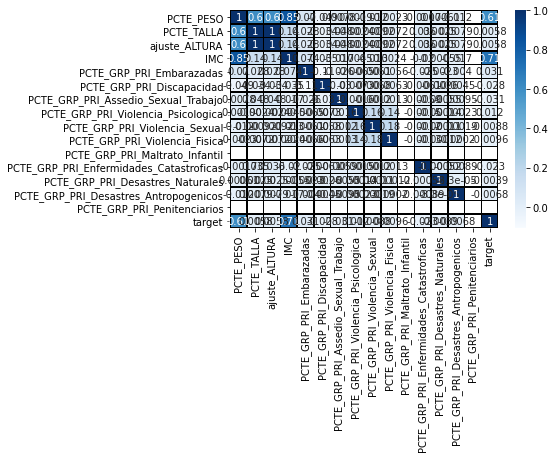

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.show()

# MODELO 3 : XBOOST

Após o resultado de 1



In [ ]:
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model3 = XGBClassifier()
model3.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model3.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 75.54%


#Distribuição normal da variável mais importante 

In [ ]:

sns.distplot(np.log1p(df['PCTE_PESO']))
plt.title('Distribuição normal')
plt.show()

NameError: ignored

In [ ]:
from bayes_opt import BayesianOptimization

ModuleNotFoundError: ignored

In [ ]:
def bayesion_opt_lgbm(X, Y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  
    dtrain = lgb.Dataset(data=X, label=Y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    # Objective Function
    def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):

        # Default parameters
        params = {
                'application':'regression',
                'num_iterations': num_iterations,
                'learning_rate':0.05, 
                'early_stopping_round':50,
                'metric':'lgb_r2_score'
        }

        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight

        cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], 
                          stratified=False, verbose_eval =None, feval=lgb_r2_score)

        return np.max(cv_results['r2-mean'])

    # Domain space-- Range of hyperparameters 
    pds = {

        'num_leaves': (80, 100),
        'feature_fraction': (0.1, 0.9),
        'bagging_fraction': (0.8, 1),
        'max_depth': (17, 25),
        'min_split_gain': (0.001, 0.1),
        'min_child_weight': (10, 25)
    }

    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)

    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)

    return optimizer

In [ ]:
results = bayesion_opt_lgbm(X.values, Y, init_iter=5, n_iters=10, random_state=77, seed=101, num_iterations=200)